In [1]:
import pandas as pd
import xml.etree.ElementTree as ET
import os
from modules import utility
import numpy as np
ML_DIR = '/home/marsdenlab/projects/SV3/user_test/ml/'
MANUAL_DIR = '/home/marsdenlab/projects/SV3/user_test//manual/'

Using TensorFlow backend.


In [2]:
def read_xml(fn):
    f = open(fn).readlines()
    f = [s.replace('\n','') for s in f]
    f = [f[0]] + f[2:]
    f = ''.join(f)
    return ET.fromstring(f)

def parse_contour_points(element):
    c = []
    for p in element:
        a = p.attrib
        x = float(a['x'])
        y = float(a['y'])
        z = float(a['z'])
        c.append([x,y,z])
    return c

def parse_path_point(element):
    id_        = element.attrib['id']
    pos_e      = element.find('pos')
    tangent_e  = element.find('tangent')
    rotation_e = element.find('rotation')
    
    p_x = float(pos_e.attrib['x'])
    p_y = float(pos_e.attrib['y'])
    p_z = float(pos_e.attrib['z'])
    
    t_x = float(tangent_e.attrib['x'])
    t_y = float(tangent_e.attrib['y'])
    t_z = float(tangent_e.attrib['z'])
    
    r_x = float(rotation_e.attrib['x'])
    r_y = float(rotation_e.attrib['y'])
    r_z = float(rotation_e.attrib['z'])

    return [p_x,p_y,p_z,t_x,t_y,t_z,r_x,r_y,r_z], id_

def parse_contour(element):
    typ    = element.attrib['type']
    method = element.attrib['method']
    path_point = element.find('path_point')
    contour_points  = element.find('contour_points')
    initial_contour = element.find('initial_contour_points')

    p, id_    = parse_path_point(path_point)
    contour_p = np.asarray(parse_contour_points(contour_points))
    contour_p = utility.normalizeContour(contour_p, p[:3], p[3:6], p[6:9])
    
    if not initial_contour == None: 
        initial_p = np.asarray(parse_contour_points(initial_contour))
        initial_p = utility.normalizeContour(initial_p, p[:3], p[3:6], p[6:9])
    else:
        initial_p = np.asarray([[0.0,0.0],[0.0,0.0],[0.0,0.0]])
        
    if "manual" in method.lower():
        dice = 0
    elif 'splinepolygon' in typ.lower():
        dice = 1
    else:
        dice = 1
        
    c = {"path_point":id_,"type":typ, "method":method, "dice":dice, 
         "px":p[0], "py":p[1], "pz":p[2], "tx":p[3], "ty":p[4], "tz":p[5],
        "rx":p[6], "ry":p[7], "rz":p[8]}
    return c, contour_p, initial_p

In [3]:
def get_contour_attribs(root):
    attribs = []
    for child in root:
        for c in child:
            if c.tag == 'contour':
                print c.tag
                attribs.append(c.attrib['type'] + " " + c.attrib['method'])
                
                for e in c:
                    print e.tag

In [4]:
ml = []
for f in os.listdir(ML_DIR):
    xml = read_xml(ML_DIR+f)
    for element in xml:
        for c in element:
            if c.tag == 'contour':
                contour = parse_contour(c)
                ml.append(contour)


396


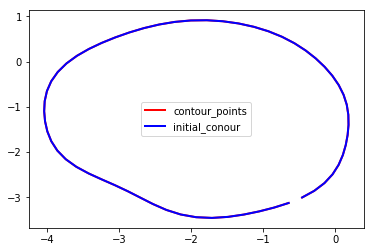

In [54]:
print len(ml)
i = np.random.randint(len(ml))
c_p = ml[i][1]
c_i = ml[i][2]

import matplotlib.pyplot as plt
plt.figure()
plt.plot(c_p[:,0],c_p[:,1],color='r',linewidth=2,label='contour_points')
plt.plot(c_i[:,0],c_i[:,1],color='b',linewidth=2,label='initial_conour')
plt.legend()
plt.show()

In [27]:
ml_set = set(ml_methods)
for s in list(ml_set):
    print s

NameError: name 'ml_methods' is not defined

In [6]:
manual_methods = []
for f in os.listdir(MANUAL_DIR):
    xml = read_xml(MANUAL_DIR+f)
    l   = get_contour_attribs(xml)
    manual_methods += l

In [9]:
manual_set = set(manual_methods)
for s in list(manual_set):
    print s

SplinePolygon Threshold + Smoothed:9 
Contour Manual + Shifted  + Smoothed 
SplinePolygon Manual + Shifted 
SplinePolygon LevelSet
Contour Legacy
Contour Manual + Smoothed  + Shifted 
Contour Threshold + Scaled + Smoothed:9 
Contour Manual + Smoothed:9 
SplinePolygon Manual + Scaled + Smoothed 
Contour Manual + Smoothed  + Shifted  + Scaled
SplinePolygon Manual + Smoothed  + Scaled + Shifted 
Contour LevelSet
Contour Threshold + Smoothed:9 
SplinePolygon LevelSet + Shifted 
SplinePolygon Manual + Smoothed  + Scaled
Contour Manual + Smoothed 
Contour LevelSet + Smoothed:9 
SplinePolygon Manual
Contour Manual + Shifted  + Scaled + Smoothed 
SplinePolygon Manual + Shifted  + Smoothed 
Contour Manual + Smoothed  + Scaled + Shifted 
Contour Manual + Shifted  + Smoothed  + Scaled
SplinePolygon Manual + Scaled + Shifted 
Contour Manual + Smoothed  + Scaled
Contour Manual + Scaled + Smoothed 
SplinePolygon Manual + Shifted  + Scaled
SplinePolygon Manual + Scaled + Shifted  + Smoothed 
Contour 